# debugging notebook

Leanne Friedrich 7/31/23: For debugging individual files

## Initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('debug.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# single folder

In [210]:
import file_handling as fh
import pandas as pd
from tools.plainIm import plainIm, plainExp
def createFailure(folder:str) -> None:
    pfd = fh.printFileDict(folder)
    failures = pd.DataFrame([{'file':os.path.join(folder, 'successes'), 'error':''}])
    if hasattr(pfd, 'failures'):
        f0, _ = plainIm(pfd.failures, ic=0)
        f0.fillna('', inplace=True)
        if len(f0)>0:
            if 'successes' in list(f0.file):
                f0.loc[0,'file'] = os.path.join(folder, 'successes')
                failures = f0
            elif os.path.join(folder, 'successes') in list(f0.file):
                return
            else:
                failures = pd.concat([failures, f0])
        failures.reset_index(drop=True, inplace=True)
    failfn = pfd.newFileName(f'failures', '.csv')
    plainExp(failfn, failures, {'file':'', 'error':''})

In [215]:
flll = fh.folderLoop(os.path.join(cfg.path.server, r'SDT'), createFailure)

In [216]:
flll.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_failures_I_PDMSS10_S_3.00_230822_152710_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.625\disturbHoriz3_1_0.625_failures_I_PDMSS10_S_3.00_230822_153304_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.750\disturbHoriz3_1_0.750_failures_I_PDMSS10_S_3.00_230822_153433_2.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_failures_I_PDMSS10_S_3.00_230822_153011_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\distu

[]

In [56]:
folder2 = os.path.join(cfg.path.server, r'SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625')
sw = SDTWorkflow(folder2)
sw.run()

In [55]:
sw.approve()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.00\I_PDMSS6-S85-0.05_S_3.00_230906\disturbVert2_2_1.000\disturbVert2_2_1.000_failures_I_PDMSS6-S85-0.05_S_3.00_230906_103135_8.csv


In [6]:
sw.putStillsAway()

IndexError: string index out of range

In [604]:
sw.getProgDims(overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_timeRewrite_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_flagFlip_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_progPos_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.875\disturbHoriz3_1_0.875_progDims_I_SO7-S20-0.5_S_4.00_230509_172108_0.csv


INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625\disturbVert2_3_0.625_nozDims_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.csv


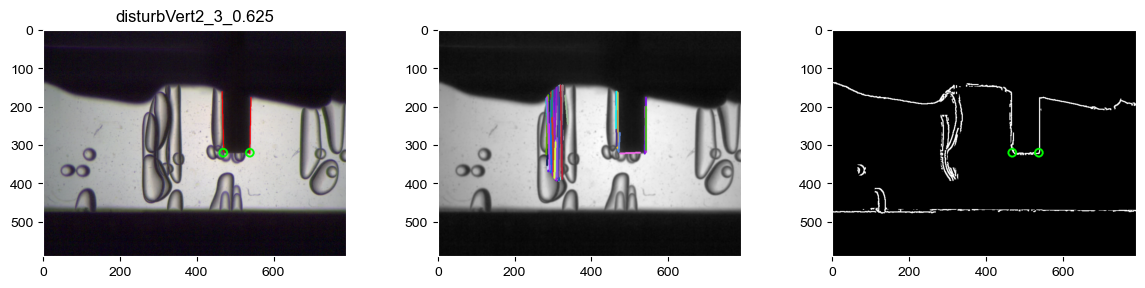

In [59]:
sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[4], frameGetMode=0)

In [664]:
sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_background_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


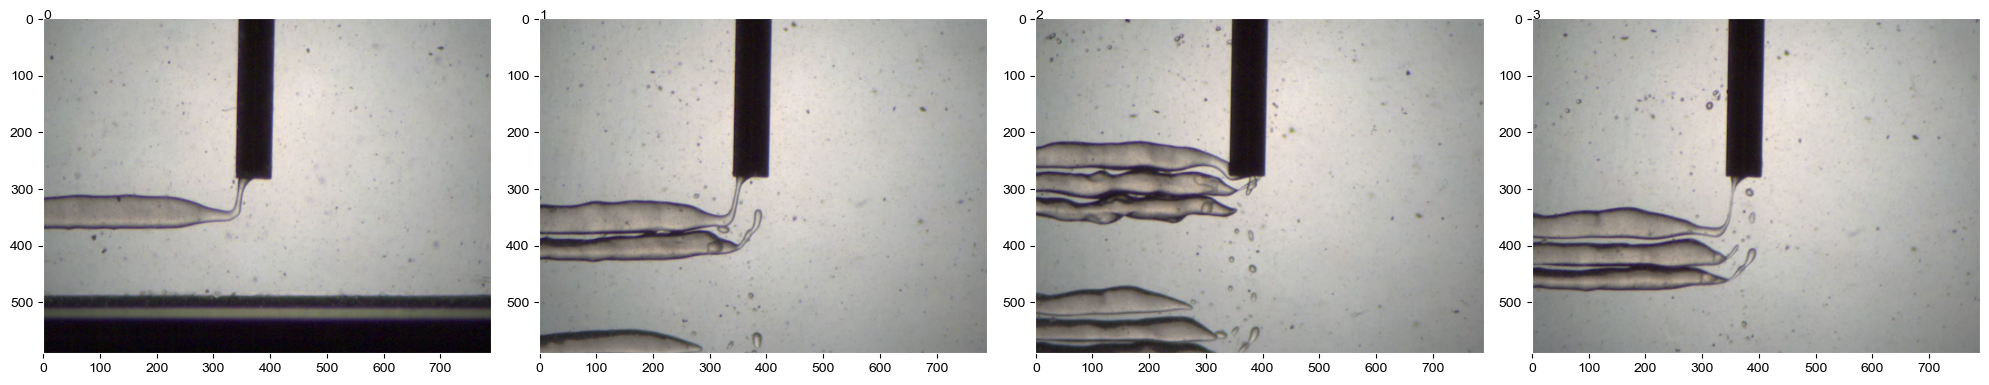

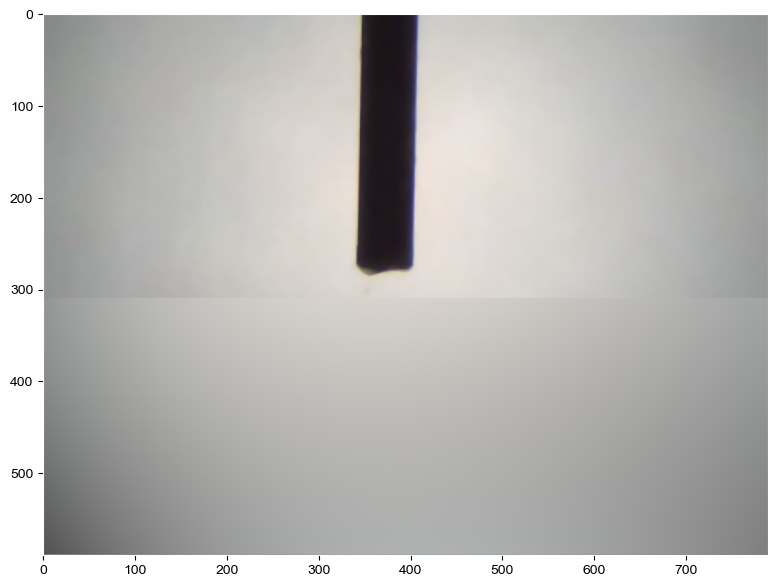

In [492]:
sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=True, numpics=4, mode=2)

In [60]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, overrideSegment=True, overwriteCropLocs=True, useML=False)

INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o1_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o2_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o3_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o4_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o5_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o6_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o7_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1o8_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1p1_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w1p2_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png


In [68]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625\disturbVert2_3_0.625_failures_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625\disturbVert2_3_0.625_measure_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625\disturbVert2_3_0.625_summary_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.csv


In [69]:
sw.showFailures()

,file,error
0,successes,
1,l0w1p1,no vals detected
2,l0w1p2,no vals detected
3,l0w1p3,no vals detected
4,l1w1p1,no vals detected
5,l1w1p2,no vals detected
6,l1w1p3,no vals detected
7,l2w1p1,no vals detected
8,l2w1p2,no vals detected
9,l2w1p3,no vals detected


,line,usedML


In [70]:
sw.approve()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.50\I_PDMSS6-S85-0.05_S_3.50_230906\disturbVert2_3_0.625\disturbVert2_3_0.625_failures_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.csv


disturbHoriz3_3_0.750_vstill_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_cropLocs_I_SO7-S20-0.5_S_4.00_230509_184700_6.csv
INFO: Exported disturbHoriz3_3_0.750_Usegment_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


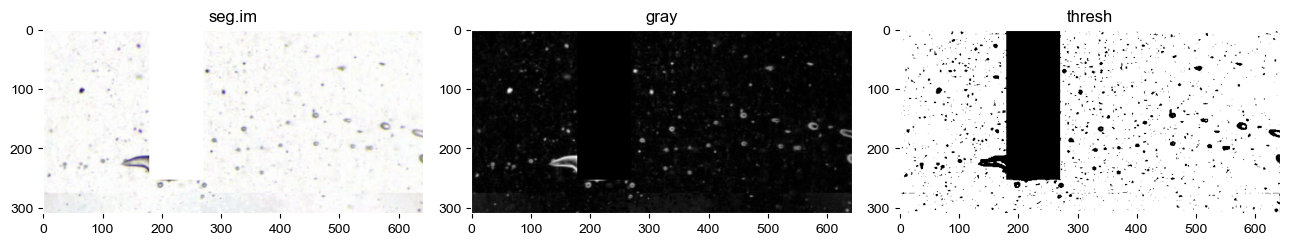

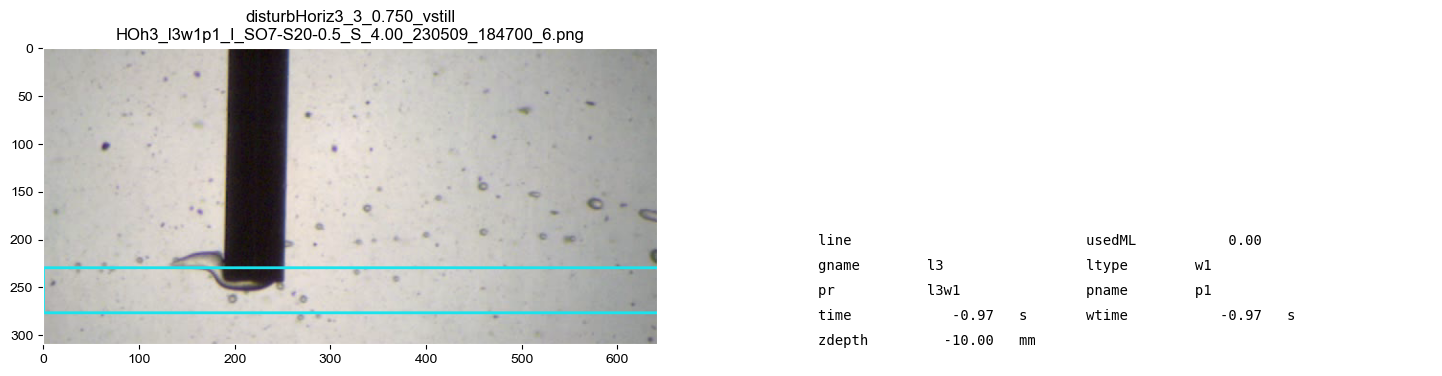

In [574]:
newcl = False
sw.testFailure(4, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [67]:
newcl = False
sw.testImage('l0w3o', diag=0,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o1_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o2_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o3_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o4_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o5_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o6_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o7_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png
INFO: Exported disturbVert2_3_0.625_Usegment_V3_l0w3o8_I_PDMSS6-S85-0.05_S_3.50_230906_151124_6.png


In [6]:
sw.openLastImage()

In [66]:
sw.openLastSeries(scrollRight=False)

In [115]:
sw.whiteOutFiles(canMatch=['_l1'])

INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o1_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\Usegment\disturbVert2_2_0.500_Usegment_V2_l1d2o1_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o2_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\Usegment\disturbVert2_2_0.500_Usegment_V2_l1d2o2_I_PDMSS8-S85-0.05_S_3.50_230818_131009_5.png
INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230818\disturbVert2_2_0.500\disturbVert2_2_0.500_vstill_V2_l1d2o3_I_PDMSS8-S85-0.05_S_3.50_230818